In [1]:
import pandas as pd
import csv
from google.colab import files


In [2]:
uploaded = files.upload()

Saving acs2017_county_data.csv to acs2017_county_data.csv
Saving covid_deaths_usafacts.csv to covid_deaths_usafacts.csv
Saving covid_confirmed_usafacts.csv to covid_confirmed_usafacts.csv


In [3]:
cases_df = pd.read_csv("covid_confirmed_usafacts.csv")
deaths_df = pd.read_csv("covid_deaths_usafacts.csv")
census_df = pd.read_csv("acs2017_county_data.csv")

In [4]:
cases_df = cases_df[["County Name", "State", "2023-07-23"]]
deaths_df = deaths_df[["County Name", "State", "2023-07-23"]]

In [5]:
census_df = census_df[["County", "State", "TotalPop", "IncomePerCap", "Poverty", "Unemployment"]]


In [6]:
print("cases_df columns:", cases_df.columns.tolist())
print("deaths_df columns:", deaths_df.columns.tolist())
print("census_df columns:", census_df.columns.tolist())

cases_df columns: ['County Name', 'State', '2023-07-23']
deaths_df columns: ['County Name', 'State', '2023-07-23']
census_df columns: ['County', 'State', 'TotalPop', 'IncomePerCap', 'Poverty', 'Unemployment']


In [7]:
cases_df["County Name"] = cases_df["County Name"].str.strip()
deaths_df["County Name"] = deaths_df["County Name"].str.strip()

In [8]:
washington_cases = cases_df[cases_df["County Name"] == "Washington County"]
print("Washington County in cases:", len(washington_cases))

washington_deaths = deaths_df[deaths_df["County Name"] == "Washington County"]
print("Washington County in deaths:", len(washington_deaths))

Washington County in cases: 30
Washington County in deaths: 30


In [9]:
cases_df = cases_df[cases_df["County Name"] != "Statewide Unallocated"]
deaths_df = deaths_df[deaths_df["County Name"] != "Statewide Unallocated"]
print("Remaining rows in cases:", len(cases_df))
print("Remaining rows in deaths:", len(deaths_df))

Remaining rows in cases: 3142
Remaining rows in deaths: 3142


In [10]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "Virgin Islands, U.S.": "VI",
}

# invert the dictionary
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

In [11]:
cases_df["State"] = cases_df["State"].map(abbrev_to_us_state)
deaths_df["State"] = deaths_df["State"].map(abbrev_to_us_state)

In [12]:
print(cases_df.head())


      County Name    State  2023-07-23
1  Autauga County  Alabama       19913
2  Baldwin County  Alabama       70521
3  Barbour County  Alabama        7582
4     Bibb County  Alabama        8149
5   Blount County  Alabama       18872


In [14]:
cases_df["key"] = cases_df["County Name"] + ", " + cases_df["State"]
deaths_df["key"] = deaths_df["County Name"] + ", " + deaths_df["State"]
census_df["key"] = census_df["County"] + ", " + census_df["State"]

In [15]:
cases_df.set_index("key", inplace=True)
deaths_df.set_index("key", inplace=True)
census_df.set_index("key", inplace=True)

In [16]:
print(census_df.head())

                                 County    State  TotalPop  IncomePerCap  \
key                                                                        
Autauga County, Alabama  Autauga County  Alabama     55036         27824   
Baldwin County, Alabama  Baldwin County  Alabama    203360         29364   
Barbour County, Alabama  Barbour County  Alabama     26201         17561   
Bibb County, Alabama        Bibb County  Alabama     22580         20911   
Blount County, Alabama    Blount County  Alabama     57667         22021   

                         Poverty  Unemployment  
key                                             
Autauga County, Alabama     13.7           5.2  
Baldwin County, Alabama     11.8           5.5  
Barbour County, Alabama     27.2          12.4  
Bibb County, Alabama        15.2           8.2  
Blount County, Alabama      15.6           4.9  


In [19]:
cases_df.rename(columns={"2023-07-23": "Cases"}, inplace=True)
deaths_df.rename(columns={"2023-07-23": "Deaths"}, inplace=True)

In [20]:
print("cases_df columns:", cases_df.columns.values.tolist())
print("deaths_df columns:", deaths_df.columns.values.tolist())

cases_df columns: ['County Name', 'State', 'Cases']
deaths_df columns: ['County Name', 'State', 'Deaths']


In [29]:
join_df = cases_df.join(deaths_df[["Deaths"]])
join_df = join_df.join(census_df[["TotalPop"]])

In [30]:
join_df["CasesPerCap"] = join_df["Cases"] / join_df["TotalPop"]
join_df["DeathsPerCap"] = join_df["Deaths"] / join_df["TotalPop"]

In [31]:
print("Number of rows in join_df:", len(join_df))

Number of rows in join_df: 3142


In [32]:

correlation_matrix = join_df.corr(numeric_only=True)
print(correlation_matrix)


                 Cases    Deaths  TotalPop  CasesPerCap  DeathsPerCap
Cases         1.000000  0.949542  0.969875     0.059670     -0.121179
Deaths        0.949542  1.000000  0.937218     0.043140     -0.044544
TotalPop      0.969875  0.937218  1.000000     0.027721     -0.141002
CasesPerCap   0.059670  0.043140  0.027721     1.000000      0.180533
DeathsPerCap -0.121179 -0.044544 -0.141002     0.180533      1.000000


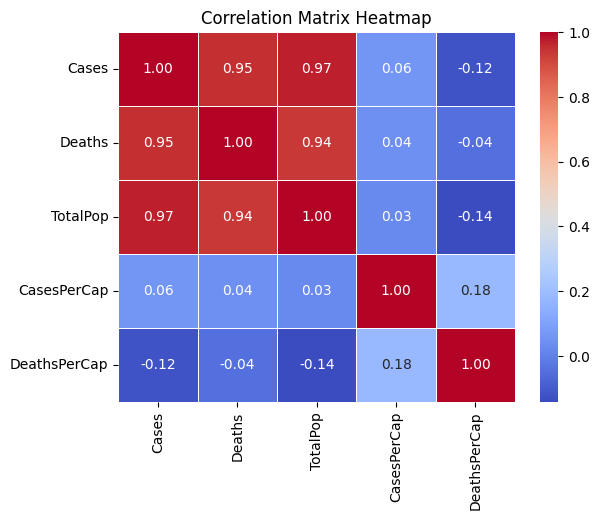

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.show()
